In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('data/breast-cancer.csv')

# Display basic info
print(data.info())
print(data.head())
print(data['diagnosis'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [3]:
# Drop 'id' column
data = data.drop(['id'], axis=1, errors='ignore')

# Encode target variable
le = LabelEncoder()
data['diagnosis'] = le.fit_transform(data['diagnosis'])  # M=1, B=0

# Separate features and target
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
# Feature selection with Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = importances.nlargest(10).index
X_train_selected = X_train_scaled[:, X.columns.get_indexer(top_features)]
X_test_selected = X_test_scaled[:, X.columns.get_indexer(top_features)]

print("Top 10 Features:", top_features)

Top 10 Features: Index(['area_worst', 'concave points_worst', 'radius_worst', 'perimeter_worst',
       'concave points_mean', 'perimeter_mean', 'radius_mean',
       'concavity_mean', 'area_mean', 'concavity_worst'],
      dtype='object')


In [5]:
# Train Random Forest on selected features
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_selected, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print(f"Selected Features Accuracy: {accuracy:.4f}")
print("Selected Features Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))

Selected Features Accuracy: 0.9649
Selected Features Classification Report:
              precision    recall  f1-score   support

      Benign       0.95      1.00      0.97        72
   Malignant       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



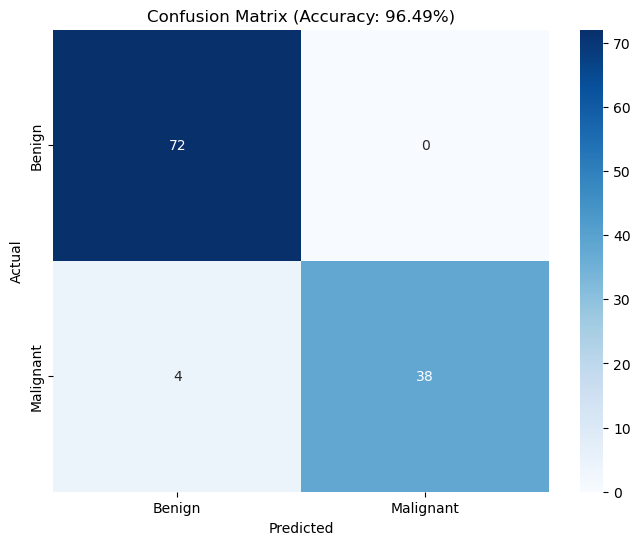

In [6]:
# Visualize confusion matrix
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Accuracy: 96.49%)')
plt.savefig('output/confusion_matrix.png')  # Save for zip file
plt.show()